# Project Wine

- Predict the quality of wine based off of the drivers of quality

# Goal

- Identify drivers of quality.
- Use drivers to develop a machine learning model to predict the quality of wine.

# Imports

In [1]:
# local imports
import wrangle as w
import explore as e
# import model as m

# Acquire

# Prepare

## Data Preprocessing Steps

###  **Column Renaming:**
   - Renamed columns to enhance readability.

### **Data Type Validation:**
   - Checked and ensured that column data types were appropriate.

### **Outlier Handling:**
   - Kept outliers in the data

### **Feature Engineering:**
   - Created custom features to enrich the dataset.

### **Categorical Variable Encoding:**
   - Encoded categorical variables, including the creation of dummy variables where necessary.

### **Data Splitting:**
   - Split the data into three sets for modeling: training, validation, and test, with an approximate split of 70/15/15.

### **Data Scaling:**
   - Scaled the data using Min-Max Scaling for modeling purposes.

In [2]:
# acquire, clean, and prepare the data
df = w.wrangle_wine()

### Quick view of data,

In [3]:
# First 5 rows of data
df.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,...,sulfur_dioxide_percentage,ph_chlorides_ratio,alcohol_sugar_ratio,density_sulfates_ratio,chlorides_sulfates_ratio,residual_sugar_percentage,alcohol_chlorides_ratio,density_sulfur_dioxide_ratio,ph_sulfur_dioxide_ratio,sulfur_dioxide_sugar_ratio
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,32.352941,46.184211,4.947368,1.781786,0.135714,5.588235,123.684211,0.029347,0.103235,17.894737
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,...,37.313433,32.653061,3.769231,1.465882,0.144118,3.880597,100.000000,0.014878,0.047761,25.769231
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,...,27.777778,35.434783,4.260870,1.533846,0.141538,4.259259,106.521739,0.018463,0.060370,23.478261


### Distribution of Zillow Data

In [4]:
# function for data distribution based on target
# wine_distribution()

# Explore

In [5]:
# change questions below

Is alcohol dependent on quality of wine?
# * Does home value have a relationship with the year property was built?
# * Does home value have a correlation with area?  
# * Does home value have a correlation with the property lot area?  

Object `wine` not found.


## Question 1. - **Is alcohol independent on quality of wine?**  

**($H0$): The quality of wine is NOT dependent on the alcohol content.**  

**($Ha$:) The quality of wine is dependent on the alcohol content.**



----------------------------------------------------------------------------------------------------

Chi2 Statistic: 899.73

P-Value: 1.91e-193



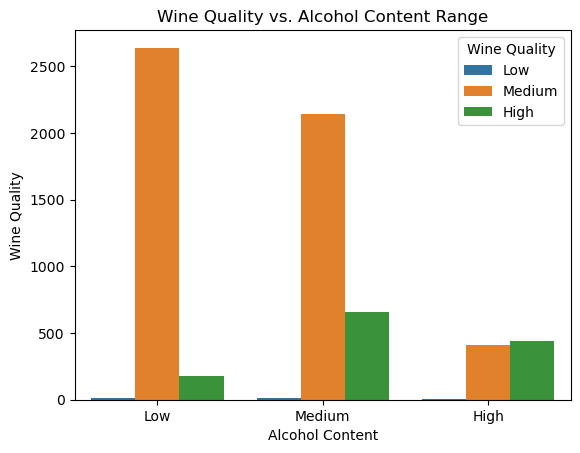


We reject the null hypothesis with a p-value of 1.91e-193.






In [6]:
# analysis 1 visualization
e.analysis_1(df, 'alcohol_bins', 'quality_bins')

## **Takeaway:**  
### We can determine that the quality of wine does is not dependent on the alcohol content of the wine. We can also clearly ee that most of the wine in the dataset is comprised of medium quality wine which ranges from a rank of 4 to 6.

## Question 2. - **Does home value have a relationship with the year property was built?**



----------------------------------------------------------------------------------------------------

P_Value: 1.0


T-Statistic: 0.0



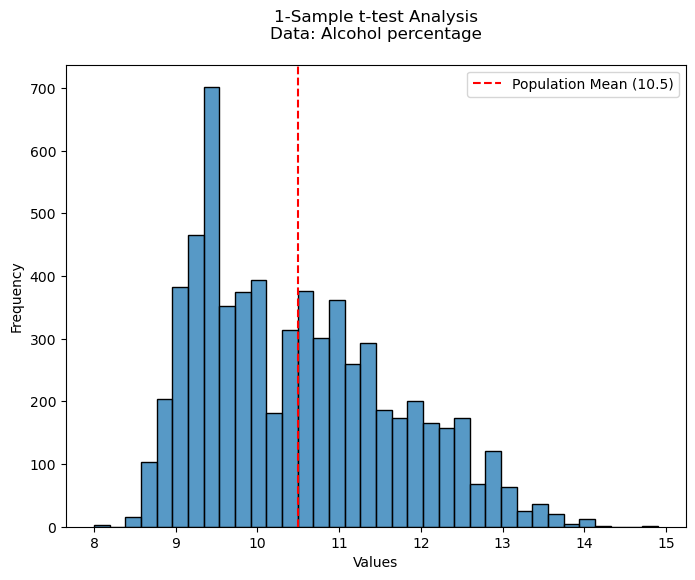


We failed to reject the null hypothesis with a p-value of 1.00e+00.


In [7]:
# analysis 2 visualization
e.analysis_2(df, 'alcohol', a=0.05)

## Takeaway:

### **The mean alcohol percentage of low-quality wines is equal to the mean alcohol percentage of high-quality wines. a larger frequency of wine is more grouped on te 9.5 to 11 range of values, so the mean value make sense for alcohol content.**

# Question 3. - **Are citric acid levels correlated with fixed acidity?**  

**($H0$): There is no linear correlation between citric acid levels and fixed acidity.**  

**($Ha$): There is a linear correlation between citric acid levels and fixed acidity.**


----------------------------------------------------------------------------------------------------

r_value: 0.3244

p_value: 4.19e-159



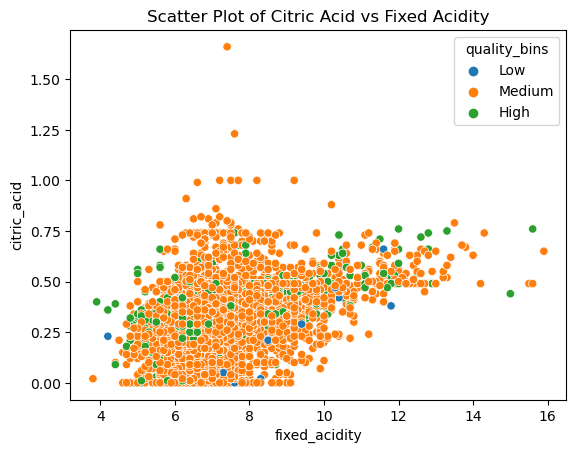


We reject the null hypothesis with a p-value of 4.19e-159.


In [8]:
# Analysis 3 visualization
e.analysis_3(df, 'fixed_acidity', 'citric_acid')

### **Takeaway:** 
### The stats test Rejected the Null Hypothesis and we can draw our conclusions that there is a strong linear correlation between property citric acid and fixed acidity over each quality type of wine

# Question 4 - **Does home_value have a correlation with the property lot area?**

- **Null Hypothesis($H0$):** There is **a significant correlation** between the lot area of the property and home value.  

- **Alternative Hypothesis($Ha$):** There **is no significant correlation** between lot area of the property and home value.

In [9]:
# analysis 4 visualization
# analysis_4(train)

### **Takeaway:** 
### The stats test Failed to Rejected the Null Hypothesis and we can draw our conclusions that there is a positive correlation between lot area and home value. it may need to be feature engineered to use as a feature.

# Explore Summary

- There is a strong relatrionship with bedrooms, and the year built.
- There is a correlation with property area, but not one with lot area
    - lot area maybe be filled with possible matching data 

# Features for modeling

### **Features that will be used:**
* *home_value*(target)  

### **Some features that may be useful:**  
* *parcel_id*
* *bathrooms*
* *bedrooms*
* *area*
* *full_bath_cnt*
* *latitude*
* *longitude*
* *lot_area*
* *region_id_county*
* *regio_id_zip*
* *rooms*
* *year_built*
* *raw_census_tract_and_block*
* *fips*
* *state*
* *county*

# Modeling

### Evaluation Metric
- The primary evaluation metrics for the models are:
  - Root Mean Squared Error (RMSE)
  - Calculated Model Significance

### Data Expansion
- Given more time, additional data could be gathered to improve model performance.
- Experimentation with hyperparameter configurations can lead to better significance and lower RMSE.

### Target Feature
- The target feature for the models is `home_value`.

### Baseline RMSE
- The baseline RMSE is approximately $797,000.

### Models and Hyperparameters
- Two different sets of hyperparameters will be used for model development, each optimized for different features:
  1. RandomForestRegressor (default)
  2. XGBoostRegressor (early stopping rounds, eval set)
  3. LinearRegression (polynomial features)

### Model Evaluation
- Models will be developed and evaluated on the training and validation datasets.

### Final Model Selection
- The best-performing model, as determined by RMSE and Model Significance on the validation set, will be selected.

### Test Dataset
- The selected best model will be evaluated on the test dataset for final performance assessment.ized and easier to understand.


## Baseline Model Root Mean Squared Error

In [10]:
# baseline and model rmse and residual plot visual
# wrangle_zillow_and_train_model()

## Best of 3 model configurations

###  selectkbest used for feature importance selection

In [11]:
# selected_features = select_k_features(train)
# selected_features.to_list()

### Used in model Evaluation and they did not offer promising results.

In [12]:
# X_train, y_train, X_val, y_val, X_test, y_test = model_xy()

## Model 1

In [13]:
### RandomForestRegression Model - The RandomForestRegression model showed signs of overfitting, as it performed well on the training data but had a large margin of error.
# model1_results = model_1(X_train, y_train, X_val, y_val)

## Model 2

In [14]:
### XGBRegressor Model - hyperparameter tuning (combination of early round stopping and eval set)
# model2_results = model_2(train, 'home_value', X_val, y_val, params=None)

## Model 3

In [15]:
### Polynomial Features LinearRegression Model - The Polynomial Features LinearRegression model exhibited better generalization, but it had poor R2 scores.
# model_3 = model_3()

## Best on Test

#### XGboost, XGBRegressor algorithm combination of early stopping rounds and eval set.

In [16]:
# final assessment on test data using XGBRegressor model
# final_results = final_model(train, 'home_value', X_test, y_test, params=None)

# Model Summary

### RandomForestRegression Model
- The RandomForestRegression model showed signs of overfitting, as it performed well on the training data but had a large margin of error.
  
### Polynomial Features LinearRegression Model
- The Polynomial Features LinearRegression model exhibited better generalization, but it had poor R2 scores.

### XGBRegressor Model
- The XGBRegressor model, with hyperparameter tuning, performed the best with the following metrics:

  - RMSE: $325,000
  - R2 Score: 0.81

# Conclusion

## Takeaways and Key Findings

- Home details such as the calculated area of the home, lot area, number of bedrooms, number of bathrooms, and year built are significant drivers of home value.
- Calculated area is the most important feature across all factors.
- Higher-priced and larger single residential family properties appear to be concentrated in Ventura County, while smaller homes are spread across Orange and Los Angeles counties.
- Larger living areas correlate with higher property values.
- Location plays a crucial role in property value.


## Model Improvement
- The model still requires further improvement.

# Recommendations and Next Steps

- If the data contained detailed of hard appliances attached or amenities homebuyers seek in single family residential properties maybe this could affect property value.

- Given more time, the following actions could be considered:
  - Gather more data to improve model performance.
  - Feature engineer new variables to enhance model understanding.
      - trasnaction dates for value over time
  - Fine-tune model parameters for better performance.